In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Import the data from database in "output" directory

These are data paths to the maps. Again, ns-maps are "no-signal maps" and ws-maps are "with signal maps". The get_data(l) function loads the 0th to the lth map in the ns-maps directory and in the ws-maps directory. It then associates 0's with the samples from the ns-maps directory and 1's with the samples fromthe ws-maps directory.

Note that the shape is as follows: (samples, features), so that if we have (10,200), it means we have 10 samples with 200 features. Here, we have a total of 200 samples, 100 of both ns-maps and ws-maps. The features are the pixel values, and since we have 400x400, there are 160000 features.

get_data(l) should then output X,y where X.shape = (2*l, 160000) and y.shape = (2*l,). 

In [2]:
data_path_ns = "../data/ns-maps/"
data_path_ws = "../data/ws-maps/"

In [5]:
def get_data(l):
    arr1 = np.array([np.load(data_path_ns + "ns-map"+str(i)+".npy").flatten() for i in range(l)])
    arr2 = np.array([np.load(data_path_ws + "ws-map"+str(i)+".npy").flatten() for i in range(l)])
    y = np.append(np.zeros(l), np.ones(l))
        
    
    return np.concatenate((arr1,arr2),axis=0), y

In [6]:
X,y = get_data(80)

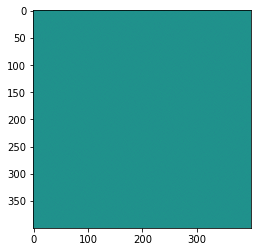

In [16]:
plt.imshow(X[0].reshape(400,400))

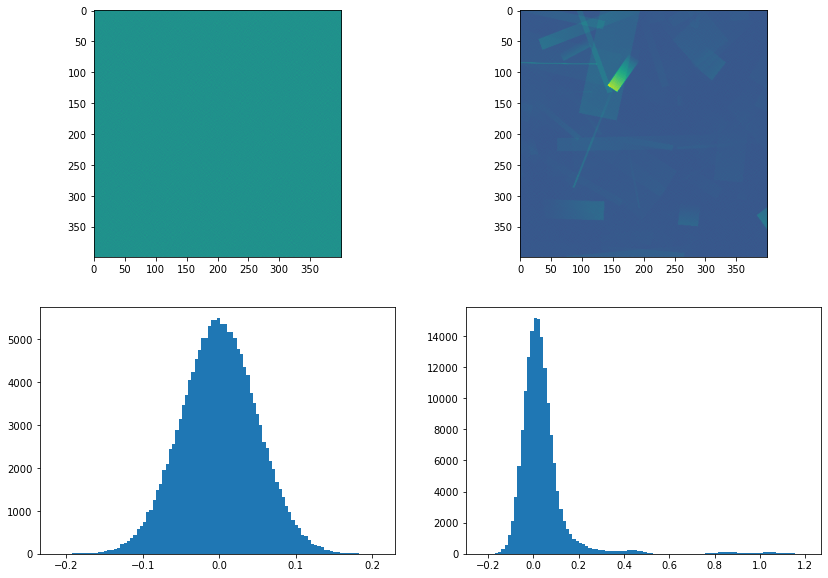

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes[0,0].imshow(X[0].reshape(400,400))
axes[0,1].imshow(X[-2].reshape(400,400))
_=axes[1,0].hist(X[0], bins=100)
_=axes[1,1].hist(X[-1], bins=100)

### Applying machine learning

We split the data into train and test, as it shuffles our data and also allows a test set to find out accuracy.

Then, we can use logistic regression to fit our data, and we can test the accuracy of this classifier.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [22]:
logreg.score(X_test, y_test)

0.975

We can then observe what kind of maps the algorithm was/wasn't able to classify.

array([1.])

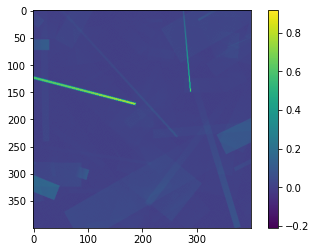

In [94]:
i = 93 #number between 80-99 (since these are the test maps)
m = np.load(data_path_ws + "ws-map"+str(i)+".npy")
plt.imshow(m)
plt.colorbar()
logreg.predict(m.reshape(1,-1))

### Understanding the predictive power

In [95]:
coefficients = logreg.coef_.reshape(-1)

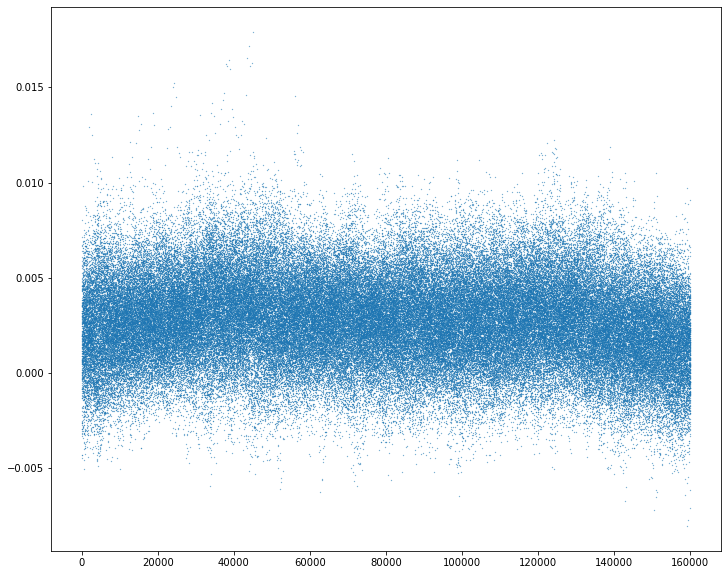

In [96]:
plt.figure(figsize=(12,10))
plt.plot(np.arange(coefficients.size), coefficients, '.', markersize=0.5)

In [99]:
(coefficients<0.00001).sum()

19434